# Load and clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import metrics

from datetime import datetime


## Load and combine datasets

#### Listings data for San Francisco

In [2]:
sf = pd.read_csv('../Data/listings_SF.csv')

print(f'San Francisco listings data: {sf.shape}')

# add column city
sf['county'] = 'San Francisco'
print(f'San Francisco listings data: {sf.shape}')

San Francisco listings data: (6508, 74)
San Francisco listings data: (6508, 75)


In [3]:
sf.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
0,958,https://www.airbnb.com/rooms/958,20211102175524,2021-11-02,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.98,4.78,City Registration Pending,f,1,1,0,0,3.57,San Francisco
1,5858,https://www.airbnb.com/rooms/5858,20211102175524,2021-11-02,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.77,4.68,NaN,f,1,1,0,0,0.76,San Francisco
2,7918,https://www.airbnb.com/rooms/7918,20211102175524,2021-11-02,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,4.73,4.00,NaN,f,9,0,9,0,0.17,San Francisco
3,8142,https://www.airbnb.com/rooms/8142,20211102175524,2021-11-02,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,4.63,4.63,NaN,f,9,0,9,0,0.10,San Francisco
4,8339,https://www.airbnb.com/rooms/8339,20211102175524,2021-11-02,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,4.94,4.75,STR-0000264,f,2,2,0,0,0.19,San Francisco


In [4]:
sf['neighbourhood'].value_counts()

San Francisco, California, United States                  4710
San Francisco, United States                                 2
San Francisco, Hayes Valley, California, United States       1
Noe Valley - San Francisco, California, United States        1
San Francisco , Ca, United States                            1
Name: neighbourhood, dtype: int64

In [5]:
sf['neighbourhood_cleansed'].value_counts()

Downtown/Civic Center    759
Mission                  557
Western Addition         460
South of Market          453
Nob Hill                 330
Bernal Heights           304
Haight Ashbury           299
Castro/Upper Market      293
Outer Sunset             260
Noe Valley               228
North Beach              190
Marina                   179
Financial District       178
Inner Richmond           169
Russian Hill             169
Bayview                  163
Pacific Heights          150
Potrero Hill             149
Outer Richmond           144
Chinatown                140
Inner Sunset             139
Excelsior                120
Parkside                 107
Outer Mission            107
Ocean View                88
West of Twin Peaks        85
Glen Park                 56
Visitacion Valley         49
Twin Peaks                47
Lakeshore                 43
Crocker Amazon            32
Presidio Heights          25
Diamond Heights           12
Seacliff                  11
Presidio      

#### Listings data for San Mateo county

In [6]:
sm = pd.read_csv('../Data/listings_SanMateo.csv')
print(f'San Mateo listings data: {sm.shape}')

# create columy county
sm['county'] = 'San Mateo'
print(f'San Mateo listings data: {sm.shape}')

San Mateo listings data: (2594, 74)
San Mateo listings data: (2594, 75)


In [7]:
sm.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
0,39342,https://www.airbnb.com/rooms/39342,20211024154859,2021-10-25,"Palm Tree Cottage, Pacifica",30 NIGHT MINIMUM. Walk to Pacifica Beach from...,Quite neighborhood with easy walk to the beach.,https://a0.muscache.com/pictures/219887/f319d2...,127367,https://www.airbnb.com/users/show/127367,...,5.00,5.00,NaN,f,2,2,0,0,0.01,San Mateo
1,45287,https://www.airbnb.com/rooms/45287,20211024154859,2021-10-25,The Garden Cottage-a secluded nature retreat,1. WE ARE COMMITTED TO THE AIRBNB CLEANING PRO...,Our neighborhood was a vacation refuge for the...,https://a0.muscache.com/pictures/miso/Hosting-...,200479,https://www.airbnb.com/users/show/200479,...,4.89,4.82,NaN,f,1,1,0,0,2.66,San Mateo
2,55301,https://www.airbnb.com/rooms/55301,20211024154859,2021-10-25,Private Cottage with Chef's Kitchen & Washer/D...,"Charming, newly renovated garden cottage with ...",The cottage is located in the Willows of Menlo...,https://a0.muscache.com/pictures/4ead0b08-8014...,261070,https://www.airbnb.com/users/show/261070,...,4.85,4.83,NaN,t,1,1,0,0,0.38,San Mateo
3,63146,https://www.airbnb.com/rooms/63146,20211024154859,2021-10-25,Downtown Two Story Cottage,"<b>The space</b><br />Peaceful, elegant and pr...","The city itself borders Redwood City, Atherton...",https://a0.muscache.com/pictures/68b66a61-deca...,308176,https://www.airbnb.com/users/show/308176,...,NaN,NaN,NaN,f,1,1,0,0,0.03,San Mateo
4,72211,https://www.airbnb.com/rooms/72211,20211024154859,2021-10-25,3 BR Home on Vineyard nr Palo Alto & Stanford,Professionally cleaned (and disinfected) detac...,This is an ideal location - close to Palo Alto...,https://a0.muscache.com/pictures/miso/Hosting-...,101491,https://www.airbnb.com/users/show/101491,...,4.86,4.86,NaN,t,1,1,0,0,1.36,San Mateo


In [8]:
sm['neighbourhood'].value_counts()

Daly City, California, United States               275
Menlo Park, California, United States              189
San Mateo, California, United States               174
Redwood City, California, United States            154
Pacifica, California, United States                123
South San Francisco, California, United States     121
San Bruno, California, United States               101
Half Moon Bay, California, United States           100
East Palo Alto, California, United States           94
San Carlos, California, United States               92
Burlingame, California, United States               62
Millbrae, California, United States                 54
Foster City, California, United States              47
Belmont, California, United States                  40
Hillsborough, California, United States             36
Woodside, California, United States                 29
Moss Beach, California, United States               20
Emerald Hills, California, United States            18
Montara, C

In [9]:
sm['neighbourhood_cleansed'].value_counts()

Daly City               362
Unincorporated Areas    340
San Mateo               249
Redwood City            209
Menlo Park              207
South San Francisco     172
Pacifica                163
East Palo Alto          159
San Bruno               135
Burlingame              115
San Carlos              105
Millbrae                 72
Half Moon Bay            70
Foster City              70
Belmont                  62
Atherton                 29
Woodside                 28
Brisbane                 20
Hillsborough             12
Colma                     9
Portola Valley            6
Name: neighbourhood_cleansed, dtype: int64

In [10]:
# rename 'Unincorporated Areas' in sm dataset to 'San Mateo Unincorporated Areas'
sm.loc[sm['neighbourhood_cleansed']=='Unincorporated Areas', 'neighbourhood_cleansed'] = 'San Mateo Unincorporated Areas'
sm['neighbourhood_cleansed'].value_counts()

Daly City                         362
San Mateo Unincorporated Areas    340
San Mateo                         249
Redwood City                      209
Menlo Park                        207
South San Francisco               172
Pacifica                          163
East Palo Alto                    159
San Bruno                         135
Burlingame                        115
San Carlos                        105
Millbrae                           72
Half Moon Bay                      70
Foster City                        70
Belmont                            62
Atherton                           29
Woodside                           28
Brisbane                           20
Hillsborough                       12
Colma                               9
Portola Valley                      6
Name: neighbourhood_cleansed, dtype: int64

#### Listings data for Santa Clara county

In [11]:
sc = pd.read_csv('../Data/listings_SantaClara.csv')

print(f'San Clara listings data: {sc.shape}')

# add column county
sc['county'] = 'Santa Clara'
print(f'San Clara listings data: {sc.shape}')

San Clara listings data: (5218, 74)
San Clara listings data: (5218, 75)


In [12]:
sc.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
0,4952,https://www.airbnb.com/rooms/4952,20211223003551,2021-12-23,Butterfly Inn near Stanford with weekly cleaning,Small private room with lovely garden setting ...,"Located in Professorville, Palo Alto, one of t...",https://a0.muscache.com/pictures/529448/3d73e0...,7054,https://www.airbnb.com/users/show/7054,...,4.89,4.78,NaN,f,5,0,5,0,0.50,Santa Clara
1,11464,https://www.airbnb.com/rooms/11464,20211223003551,2021-12-23,Deluxe Studio 5 min. to SC Kaiser & Apple Park,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,https://a0.muscache.com/pictures/121321/2c5a5a...,42458,https://www.airbnb.com/users/show/42458,...,4.86,4.64,NaN,f,14,14,0,0,0.15,Santa Clara
2,21373,https://www.airbnb.com/rooms/21373,20211223003551,2021-12-23,Bonsai Garden near Stanford with weekly cleaning,Small bedroom and desk Lovely garden setting i...,This room is in an ultra convenient location i...,https://a0.muscache.com/pictures/527285/0f9d08...,7054,https://www.airbnb.com/users/show/7054,...,4.96,4.75,NaN,f,5,0,5,0,1.87,Santa Clara
3,37512,https://www.airbnb.com/rooms/37512,20211223003551,2021-12-23,Private room - Parking 3 carport,We live in a safe community close to public tr...,Our community is a safe environment and at nig...,https://a0.muscache.com/pictures/47698055/32c3...,161741,https://www.airbnb.com/users/show/161741,...,4.48,4.70,NaN,f,2,0,2,0,1.32,Santa Clara
4,40560,https://www.airbnb.com/rooms/40560,20211223003551,2021-12-23,MOST COMFORTABLE BED EVER,"The ""Purple Room,"" as I call it, is great for ...",My neighborhood is lovely and a great place to...,https://a0.muscache.com/pictures/630306/19db9b...,174725,https://www.airbnb.com/users/show/174725,...,4.94,4.83,NaN,f,3,0,3,0,0.98,Santa Clara


In [13]:
# merge in neighborhood

In [14]:
sc['neighbourhood'].value_counts()

San Jose, California, United States           1405
Palo Alto, California, United States           397
Mountain View, California, United States       296
Santa Clara, California, United States         288
Sunnyvale, California, United States           278
Milpitas, California, United States             90
Cupertino, California, United States            81
Los Gatos, California, United States            79
Campbell, California, United States             78
Los Altos, California, United States            49
Saratoga, California, United States             42
Morgan Hill, California, United States          35
Gilroy, California, United States               22
Los Altos Hills, California, United States      20
Monte Sereno, California, United States         10
San Martin, California, United States            7
Menlo Park, California, United States            2
Hollister, California, United States             2
Sunnyvalle, California, United States            1
Los Gatos , California, United 

In [15]:
sc['neighbourhood_cleansed'].value_counts()

San Jose                2189
Palo Alto                586
Santa Clara              519
Sunnyvale                486
Mountain View            474
Unincorporated Areas     246
Milpitas                 161
Cupertino                153
Campbell                 131
Los Gatos                 67
Los Altos                 60
Saratoga                  51
Los Altos Hills           33
Morgan Hill               33
Gilroy                    16
Monte Sereno              13
Name: neighbourhood_cleansed, dtype: int64

In [16]:
# rename 'Unincorporated Areas' in sc dataset to 'Santa Clara Unincorporated Areas'
sc.loc[sc['neighbourhood_cleansed']=='Unincorporated Areas', 'neighbourhood_cleansed'] = 'Santa Clara Unincorporated Areas'
sc['neighbourhood_cleansed'].value_counts()

San Jose                            2189
Palo Alto                            586
Santa Clara                          519
Sunnyvale                            486
Mountain View                        474
Santa Clara Unincorporated Areas     246
Milpitas                             161
Cupertino                            153
Campbell                             131
Los Gatos                             67
Los Altos                             60
Saratoga                              51
Los Altos Hills                       33
Morgan Hill                           33
Gilroy                                16
Monte Sereno                          13
Name: neighbourhood_cleansed, dtype: int64

#### Combine datasets of 3 counties

In [17]:
# combine the 3 datasets
listings = pd.concat([sf, sm, sc], ignore_index=True)
listings.shape

(14320, 75)

In [18]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
0,958,https://www.airbnb.com/rooms/958,20211102175524,2021-11-02,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.98,4.78,City Registration Pending,f,1,1,0,0,3.57,San Francisco
1,5858,https://www.airbnb.com/rooms/5858,20211102175524,2021-11-02,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.77,4.68,NaN,f,1,1,0,0,0.76,San Francisco
2,7918,https://www.airbnb.com/rooms/7918,20211102175524,2021-11-02,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,4.73,4.00,NaN,f,9,0,9,0,0.17,San Francisco
3,8142,https://www.airbnb.com/rooms/8142,20211102175524,2021-11-02,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,4.63,4.63,NaN,f,9,0,9,0,0.10,San Francisco
4,8339,https://www.airbnb.com/rooms/8339,20211102175524,2021-11-02,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,4.94,4.75,STR-0000264,f,2,2,0,0,0.19,San Francisco


In [19]:
listings.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
14315,53940555,https://www.airbnb.com/rooms/53940555,20211223003551,2021-12-23,A place to call home | 3 BR in San Jose,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/REAL_ESTATE_C...,359049232,https://www.airbnb.com/users/show/359049232,...,NaN,NaN,NaN,t,122,122,0,0,NaN,Santa Clara
14316,53945814,https://www.airbnb.com/rooms/53945814,20211223003551,2021-12-23,"Premium San Jose 1BR w/ Pool & Gym, walk to Ca...",Show up and start living from day one in San J...,This furnished apartment is located in San Jos...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,NaN,t,243,243,0,0,NaN,Santa Clara
14317,53945899,https://www.airbnb.com/rooms/53945899,20211223003551,2021-12-23,"Roomy Campbell 1BR w/ Gym, Pool & Hot Tub, wal...",Feel at home wherever you choose to live with ...,This furnished apartment is located in Campbel...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,NaN,t,243,243,0,0,NaN,Santa Clara
14318,53950266,https://www.airbnb.com/rooms/53950266,20211223003551,2021-12-23,"Bright Sunnyvale 1BR w/ Pool, Gym & W/D, walk ...","Discover the best of Sunnyvale, with this one-...",This furnished apartment is in the heart of th...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,NaN,t,243,243,0,0,NaN,Santa Clara
14319,53950313,https://www.airbnb.com/rooms/53950313,20211223003551,2021-12-23,"Roomy San Jose 1BR w/ Gym & Pool, good access ...",Feel at home wherever you choose to live with ...,This furnished apartment is located in San Jos...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,NaN,t,243,243,0,0,NaN,Santa Clara


## Data Cleaning

### Set id as the index

In [20]:
listings.shape

(14320, 75)

In [21]:
# drop duplicates in id
listings['id'].duplicated().sum()

3

In [22]:
duplicated_id = listings.loc[listings['id'].duplicated(), 'id']
duplicated_id

9205      1398981
13782    52383961
13940    52903771
Name: id, dtype: int64

In [23]:
listings.loc[listings['id'].isin(duplicated_id), :].sort_values('id')

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
6580,1398981,https://www.airbnb.com/rooms/1398981,20211024154859,2021-10-25,Heart of Silicon Valley,"2 bedroom, 1 bathroom, cozy kitchen and access...",**Please note my home is located on the Westsi...,https://a0.muscache.com/pictures/f2d6bbfd-dac5...,52835,https://www.airbnb.com/users/show/52835,...,4.6,4.76,NaN,f,1,1,0,0,0.64,San Mateo
9205,1398981,https://www.airbnb.com/rooms/1398981,20211223003551,2021-12-23,Heart of Silicon Valley,"2 bedroom, 1 bathroom, cozy kitchen and access...",**Please note my home is located on the Westsi...,https://a0.muscache.com/pictures/f2d6bbfd-dac5...,52835,https://www.airbnb.com/users/show/52835,...,4.6,4.76,NaN,f,1,1,0,0,0.37,Santa Clara
8979,52383961,https://www.airbnb.com/rooms/52383961,20211024154859,2021-10-25,1. Elite Hacker House steps to University Avenue,Welcome to my house.<br /><br />Your host stri...,"Downtown Palo Alto is beautiful, near Stanford...",https://a0.muscache.com/pictures/miso/Hosting-...,423470925,https://www.airbnb.com/users/show/423470925,...,NaN,NaN,NaN,t,1,0,0,1,NaN,San Mateo
13782,52383961,https://www.airbnb.com/rooms/52383961,20211223003551,2021-12-23,1. Stanford Hacker House,Shared room with single beds and bunk beds.<br...,Beautiful downtown North neighborhood is the m...,https://a0.muscache.com/pictures/91c8ce73-bc76...,423470925,https://www.airbnb.com/users/show/423470925,...,1.0,1.00,NaN,t,6,0,0,6,1.00,Santa Clara
9091,52903771,https://www.airbnb.com/rooms/52903771,20211024154859,2021-10-25,Adorable Bedroom w/private entrance 5min Downton,"Adorable bedroom, just 2 blocks from Universit...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,9453007,https://www.airbnb.com/users/show/9453007,...,NaN,NaN,NaN,t,1,0,1,0,NaN,San Mateo
13940,52903771,https://www.airbnb.com/rooms/52903771,20211223003551,2021-12-23,Adorable Bedroom 5min Downton Palo Alto,"Adorable bedroom, just 2 blocks from Universit...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,9453007,https://www.airbnb.com/users/show/9453007,...,4.5,4.00,NaN,t,4,2,2,0,1.25,Santa Clara


In [24]:
listings.drop_duplicates(subset='id', inplace=True)
listings.shape

(14317, 75)

In [25]:
# make listing id as index
listings = listings.set_index(listings['id']).drop(columns=['id'])
listings.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,county
id,,,,,,,,,,,,,,,,,,,,,
958,https://www.airbnb.com/rooms/958,20211102175524,2021-11-02,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,Holly,...,4.98,4.78,City Registration Pending,f,1,1,0,0,3.57,San Francisco
5858,https://www.airbnb.com/rooms/5858,20211102175524,2021-11-02,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.77,4.68,NaN,f,1,1,0,0,0.76,San Francisco
7918,https://www.airbnb.com/rooms/7918,20211102175524,2021-11-02,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,Aaron,...,4.73,4.00,NaN,f,9,0,9,0,0.17,San Francisco
8142,https://www.airbnb.com/rooms/8142,20211102175524,2021-11-02,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,Aaron,...,4.63,4.63,NaN,f,9,0,9,0,0.10,San Francisco
8339,https://www.airbnb.com/rooms/8339,20211102175524,2021-11-02,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,Rosy,...,4.94,4.75,STR-0000264,f,2,2,0,0,0.19,San Francisco


### Check na's

In [26]:
listings.isnull().sum().sort_values(ascending=False).head(43)

calendar_updated                14317
bathrooms                       14317
neighbourhood_group_cleansed    14317
license                         10499
neighborhood_overview            4587
neighbourhood                    4587
host_about                       4572
review_scores_checkin            3022
review_scores_location           3022
review_scores_value              3022
review_scores_communication      3021
review_scores_accuracy           3021
review_scores_cleanliness        3021
last_review                      2958
reviews_per_month                2958
first_review                     2958
review_scores_rating             2958
host_response_time               2668
host_response_rate               2668
host_acceptance_rate             2393
host_neighbourhood               1662
bedrooms                         1456
beds                              460
description                       276
host_location                      30
bathrooms_text                     20
host_total_l

In [27]:
listings.isnull().mean().sort_values(ascending=False).head(43)

calendar_updated                1.000000
bathrooms                       1.000000
neighbourhood_group_cleansed    1.000000
license                         0.733324
neighborhood_overview           0.320388
neighbourhood                   0.320388
host_about                      0.319341
review_scores_checkin           0.211078
review_scores_location          0.211078
review_scores_value             0.211078
review_scores_communication     0.211008
review_scores_accuracy          0.211008
review_scores_cleanliness       0.211008
last_review                     0.206608
reviews_per_month               0.206608
first_review                    0.206608
review_scores_rating            0.206608
host_response_time              0.186352
host_response_rate              0.186352
host_acceptance_rate            0.167144
host_neighbourhood              0.116086
bedrooms                        0.101697
beds                            0.032130
description                     0.019278
host_location   

In [28]:
# drop columns that are mostly missing: neighbourhood_group_cleansed, bathrooms, calendar_updated, license 
# drop neighbourhood (use neighbourhood_cleansed)

cols_drop = ['neighbourhood_group_cleansed','bathrooms','calendar_updated','license','neighbourhood']

listings.drop(columns=cols_drop, inplace=True)
print(listings.shape)

listings.isnull().mean().sort_values(ascending=False).head()

(14317, 69)


neighborhood_overview     0.320388
host_about                0.319341
review_scores_value       0.211078
review_scores_location    0.211078
review_scores_checkin     0.211078
dtype: float64

In [29]:
listings_na_df = pd.DataFrame(listings.isnull().mean().sort_values(ascending=False), columns=['na_perc'])
listings_na_df.head(40)

,na_perc
neighborhood_overview,0.320388
host_about,0.319341
review_scores_value,0.211078
review_scores_location,0.211078
review_scores_checkin,0.211078
review_scores_accuracy,0.211008
review_scores_communication,0.211008
review_scores_cleanliness,0.211008
last_review,0.206608
review_scores_rating,0.206608


In [30]:
# create flag columns for the columns with many na's
cols_flag = ['neighborhood_overview','host_about','last_review','first_review','reviews_per_month',
             'host_response_time','host_response_rate','host_acceptance_rate','host_neighbourhood',
             'bedrooms']

for col in cols_flag:
    listings[col+'_f'] = np.where(listings[col].isnull(), 0, 1)

listings[['neighborhood_overview','host_about','last_review','first_review','reviews_per_month',
     'neighborhood_overview_f','host_about_f','last_review_f','first_review_f','reviews_per_month_f']]

,neighborhood_overview,host_about,last_review,first_review,reviews_per_month,neighborhood_overview_f,host_about_f,last_review_f,first_review_f,reviews_per_month_f
id,,,,,,,,,,
958,Quiet cul de sac in friendly neighborhood<br /...,We are a family of four that live upstairs. W...,2021-10-16,2014-10-05,3.57,1,1,1,1,1
5858,I love how our neighborhood feels quiet but is...,Philip: English transplant to the Bay Area and...,2015-08-28,2009-11-24,0.76,1,1,1,1,1
7918,"Shopping old town, restaurants, McDonald, Whol...",7 minutes walk to UCSF hospital & school campu...,2020-03-06,2012-08-27,0.17,1,1,1,1,1
8142,NaN,7 minutes walk to UCSF hospital & school campu...,2017-08-12,2015-03-03,0.10,0,1,1,1,1
8339,NaN,I'm an Interior Stylist living in SF. \r\n\r\n...,2019-06-28,2009-09-25,0.19,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
53940555,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
53945814,This furnished apartment is located in San Jos...,Why take a chance picking & choosing between s...,NaN,NaN,NaN,1,1,0,0,0
53945899,This furnished apartment is located in Campbel...,Why take a chance picking & choosing between s...,NaN,NaN,NaN,1,1,0,0,0


In [31]:
listings[['host_since', 'first_review', 'last_review']].apply(lambda x: pd.to_datetime(x)).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14317 entries, 958 to 53950313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host_since    14303 non-null  datetime64[ns]
 1   first_review  11359 non-null  datetime64[ns]
 2   last_review   11359 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 447.4 KB


### Convert object columns to datetime 

In [32]:
# https://www.statology.org/convert-datetime-to-date-pandas/

print(listings[['host_since', 'first_review', 'last_review']].info())
print()

listings[['host_since', 'first_review', 'last_review']] = listings[['host_since', 'first_review', 'last_review']].apply(lambda x: pd.to_datetime(x))
listings[['host_since', 'first_review', 'last_review']] = listings[['host_since', 'first_review', 'last_review']].apply(lambda x: x.dt.normalize())

print(listings[['host_since', 'first_review', 'last_review']].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14317 entries, 958 to 53950313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   host_since    14303 non-null  object
 1   first_review  11359 non-null  object
 2   last_review   11359 non-null  object
dtypes: object(3)
memory usage: 447.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14317 entries, 958 to 53950313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host_since    14303 non-null  datetime64[ns]
 1   first_review  11359 non-null  datetime64[ns]
 2   last_review   11359 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 447.4 KB
None


In [33]:
listings[['host_since', 'first_review', 'last_review']].head()

,host_since,first_review,last_review
id,,,
958,2008-07-31,2014-10-05,2021-10-16
5858,2009-03-02,2009-11-24,2015-08-28
7918,2009-06-17,2012-08-27,2020-03-06
8142,2009-06-17,2015-03-03,2017-08-12
8339,2009-07-02,2009-09-25,2019-06-28


In [34]:
listings[['host_since', 'first_review', 'last_review']].describe(datetime_is_numeric=True)

,host_since,first_review,last_review
count,14303,11359,11359
mean,2015-11-29 08:15:08.117178368,2018-12-02 10:17:07.484813824,2021-02-03 22:18:04.532089088
min,2008-07-31 00:00:00,2009-08-02 00:00:00,2010-10-04 00:00:00
25%,2013-10-17 12:00:00,2017-07-03 00:00:00,2020-07-26 00:00:00
50%,2015-11-02 00:00:00,2019-04-30 00:00:00,2021-09-06 00:00:00
75%,2017-11-12 00:00:00,2020-11-21 00:00:00,2021-10-22 00:00:00
max,2021-12-19 00:00:00,2021-12-22 00:00:00,2021-12-22 00:00:00


### Check on availability columns

In [35]:
# availability columns: availability_30, availability_60, availability_90, availability_365

listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe()

,availability_30,availability_60,availability_90,availability_365
count,14317.000000,14317.000000,14317.000000,14317.000000
mean,11.962352,28.592862,47.889502,184.603548
std,11.831081,23.289104,33.642578,133.619188
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,13.000000,61.000000
50%,9.000000,29.000000,53.000000,172.000000
75%,24.000000,53.000000,81.000000,326.000000
max,30.000000,60.000000,90.000000,365.000000


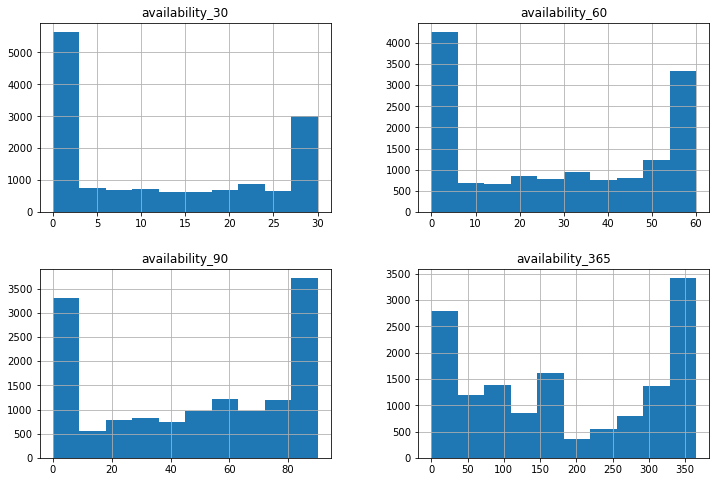

In [36]:
listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].hist(figsize=(12,8));

In [37]:
# proportion of listings that have the full availability for the duration
listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].apply(lambda x: (x==x.max()).mean())

availability_30     0.124258
availability_60     0.117972
availability_90     0.103653
availability_365    0.068799
dtype: float64

In [38]:
# proportion of listings that have 0 availability for the duration
listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].apply(lambda x: (x==0).mean())

availability_30     0.341552
availability_60     0.244395
availability_90     0.182021
availability_365    0.122512
dtype: float64

**Decision**: This analysis will focus on listings that have availability within the next 90 days. It is hard to predict prices for listings that have no avavilability in 90 days (they may not be active even), so these listings are dropped from data.

In [39]:
print(listings.shape)
listings = listings.loc[listings['availability_90'] != 0, :]
print(listings.shape)

(14317, 79)
(11711, 79)


In [40]:
listings[['availability_30', 'availability_60', 'availability_90', 'availability_365']].apply(lambda x: (x==0).mean())

availability_30     0.195030
availability_60     0.076253
availability_90     0.000000
availability_365    0.000000
dtype: float64

In [41]:
listings.isnull().mean().sort_values(ascending=False).head(43)

neighborhood_overview                           0.328922
host_about                                      0.327214
review_scores_checkin                           0.209034
review_scores_location                          0.209034
review_scores_value                             0.209034
review_scores_accuracy                          0.208949
review_scores_cleanliness                       0.208949
review_scores_communication                     0.208949
review_scores_rating                            0.204765
reviews_per_month                               0.204765
last_review                                     0.204765
first_review                                    0.204765
host_response_time                              0.139783
host_response_rate                              0.139783
host_acceptance_rate                            0.136794
host_neighbourhood                              0.118094
bedrooms                                        0.102126
beds                           

### Check review date

In [42]:
listings['last_review'].describe(datetime_is_numeric=True)

count                             9313
mean     2021-03-19 03:04:46.438311936
min                2010-10-04 00:00:00
25%                2021-03-14 00:00:00
50%                2021-09-25 00:00:00
75%                2021-10-25 00:00:00
max                2021-12-22 00:00:00
Name: last_review, dtype: object

In [43]:
# proportion of listings that have last review more than 6 mos ago
(listings['last_review'] < datetime.strptime('2021-04-30', '%Y-%m-%d')).mean()

0.21040047818290497

### Check on price 

In [44]:
# Price
listings['price'] = listings['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)
listings['price'].describe()

count    11711.000000
mean       198.958244
std        295.675892
min         10.000000
25%         84.000000
50%        135.000000
75%        219.000000
max      10000.000000
Name: price, dtype: float64

In [45]:
np.quantile(listings['price'], [0.99, 0.995, 0.999])

array([1149.4 , 1697.25, 3857.42])

In [46]:
(listings['price'] > 1500).mean()

0.005550337289727606

**Decision**: Drop listings that are more than $1500/night, which composes 0.25% of the data.

In [47]:
# drop rows with price over $1500/night
listings = listings.loc[listings['price'] <= 1500, :]
listings.shape

(11646, 79)

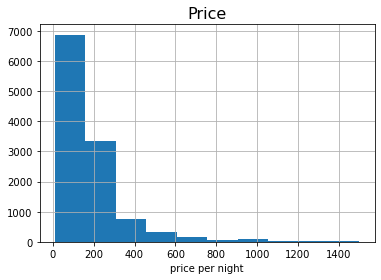

In [48]:
listings['price'].hist()
plt.title('Price', fontsize=16)
plt.xlabel('price per night'); 

plt.savefig('../Plots/price_hist.png')

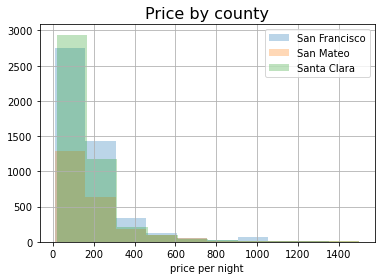

In [49]:
listings.groupby('county')['price'].hist(alpha=0.3, legend=True)
plt.legend()
plt.title('Price by county', fontsize=16)
plt.xlabel('price per night');

plt.savefig('../Plots/price_bycounty_hist.png')

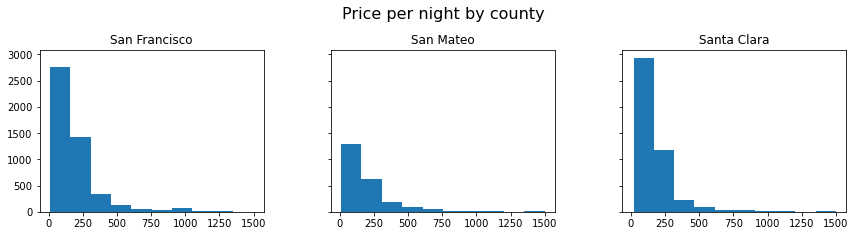

In [50]:
listings.hist(column='price', by='county', figsize=(14,3), layout=(1,3), xrot=0, legend=False, sharex=True, sharey=True)
;
plt.suptitle('Price per night by county', x=0.5, y=1.1, fontsize=16)
plt.savefig('../Plots/price_bycounty_hist2.png')

**Observation**: 
1. Most of the listings are below 300 dollar a night. It is true for all three counties. All three counties have a small number of listings for over 1000 dollar a night.
2. San Francisco and Santa Clara have more listings than San Mateo. 

#### Check neighbourhood_cleansed, property type, room type

In [51]:
# neighbourhood
count_by_neighbourhood = pd.DataFrame(listings['neighbourhood_cleansed'].value_counts(normalize=True)).rename(columns={'neighbourhood_cleansed':'proportion'})
count_by_neighbourhood['cum_prop'] = count_by_neighbourhood['proportion'].cumsum()
count_by_neighbourhood['count'] = listings['neighbourhood_cleansed'].value_counts()
count_by_neighbourhood.head(60)

,proportion,cum_prop,count
San Jose,0.163575,0.163575,1905
Downtown/Civic Center,0.046196,0.209772,538
Palo Alto,0.040787,0.250558,475
Santa Clara,0.037953,0.288511,442
Mountain View,0.037352,0.325863,435
Sunnyvale,0.037008,0.362871,431
Mission,0.034776,0.397647,405
Western Addition,0.029538,0.427185,344
South of Market,0.029195,0.456380,340
Daly City,0.027477,0.483857,320


In [52]:
len(listings['neighbourhood_cleansed'].unique())

73

In [53]:
# property_type
count_by_property_type = pd.DataFrame(listings['property_type'].value_counts(normalize=True)).rename(columns={'property_type':'proportion'})
count_by_property_type['cum_prop'] = count_by_property_type['proportion'].cumsum()
count_by_property_type['count'] = listings['property_type'].value_counts()
count_by_property_type[count_by_property_type['count'] >= 50]

,proportion,cum_prop,count
Entire rental unit,0.219646,0.219646,2558
Private room in residential home,0.199296,0.418942,2321
Entire residential home,0.158509,0.577451,1846
Entire guest suite,0.066718,0.644170,777
Entire condominium (condo),0.052808,0.696978,615
Private room in rental unit,0.047656,0.744633,555
Entire serviced apartment,0.038468,0.783101,448
Entire guesthouse,0.035033,0.818135,408
Room in boutique hotel,0.031513,0.849648,367
Room in hotel,0.016830,0.866478,196


In [54]:
len(listings['property_type'].unique())

79

**Decision**: Drop property types that have less than 50 listings.

In [55]:
temp = list(count_by_property_type.index[count_by_property_type['count'] >= 50])
temp


['Entire rental unit',
 'Private room in residential home',
 'Entire residential home',
 'Entire guest suite',
 'Entire condominium (condo)',
 'Private room in rental unit',
 'Entire serviced apartment',
 'Entire guesthouse',
 'Room in boutique hotel',
 'Room in hotel',
 'Shared room in residential home',
 'Private room in condominium (condo)',
 'Private room in townhouse',
 'Entire townhouse',
 'Private room in guest suite',
 'Entire loft',
 'Private room in villa',
 'Entire cottage']

In [56]:
listings = listings.loc[listings['property_type'].isin(temp), :]
listings.shape

(11102, 79)

In [57]:
# room_type
count_by_room_type = pd.DataFrame(listings['room_type'].value_counts(normalize=True)).rename(columns={'room_type':'proportion'})
count_by_room_type['cum_prop'] = count_by_room_type['proportion'].cumsum()
count_by_room_type['count'] = listings['room_type'].value_counts()
count_by_room_type

,proportion,cum_prop,count
Entire home/apt,0.625833,0.625833,6948
Private room,0.352999,0.978833,3919
Shared room,0.017204,0.996037,191
Hotel room,0.003963,1.000000,44


In [58]:
# maximum_nights
listings['maximum_nights'].sort_values(ascending=False).head(20)

id
413663      10000
14189398    10000
4576349      9999
781945       1195
48043568     1125
48226091     1125
48216339     1125
48185069     1125
48158597     1125
48150867     1125
48122819     1125
48118729     1125
48073721     1125
48047846     1125
48047010     1125
48043500     1125
48344539     1125
47982786     1125
47928655     1125
47918246     1125
Name: maximum_nights, dtype: int64

**Decision**: Drop rows with maximum_nights > 1125.

In [59]:
listings = listings.loc[listings['maximum_nights'] <= 1125, :]
listings.shape

(11098, 79)

In [60]:
# bathrooms_text
listings['bathrooms_text'].value_counts()

1 bath               4891
2 baths              1514
1 private bath       1388
1 shared bath        1358
1.5 baths             379
3 baths               296
2.5 baths             275
2 shared baths        252
1.5 shared baths      245
3 shared baths        101
3.5 baths              77
4 baths                55
2.5 shared baths       49
5 shared baths         43
4 shared baths         33
0 shared baths         27
5 baths                21
4.5 baths              17
0 baths                17
Shared half-bath       13
3.5 shared baths       12
6 baths                 7
Private half-bath       5
5.5 baths               4
Half-bath               3
4.5 shared baths        2
6.5 baths               2
8 baths                 1
Name: bathrooms_text, dtype: int64

In [61]:
listings['bathrooms_text']

id
958                 1 bath
5858                1 bath
7918        4 shared baths
8142        4 shared baths
8339             1.5 baths
                 ...      
53940555           2 baths
53945814            1 bath
53945899            1 bath
53950266            1 bath
53950313            1 bath
Name: bathrooms_text, Length: 11098, dtype: object

In [62]:
# listings['bathrooms_text'].str.split()   # need to work on!!!

In [63]:
# need to work on!!!
#listings['baths'] = listings['bathrooms_text'].split()[0]
#listings['bath_type'] = listings['bathrooms_text'].split()[1:]

### Create the dataset for Stage 1 modeling: predict listing price with basic features: 
location, room type, size

In [64]:
listings.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
    

In [65]:
# basic features
features_m1 = ['neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
               'room_type', 'accommodates','bedrooms', 'beds',
               #'bathrooms_text', 'amenities',
               'minimum_nights', 'maximum_nights']

In [66]:
df_m1 = listings[features_m1 + ['price']]
print(df_m1.shape)
df_m1.head()


(11098, 11)


,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,price
id,,,,,,,,,,,
958,Western Addition,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,1.0,2.0,2,30,161.0
5858,Bernal Heights,37.74474,-122.42089,Entire rental unit,Entire home/apt,5,2.0,3.0,30,60,235.0
7918,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,2,1.0,1.0,32,60,56.0
8142,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,2,1.0,1.0,32,90,56.0
8339,Western Addition,37.77564,-122.43642,Entire condominium (condo),Entire home/apt,4,2.0,2.0,7,111,895.0


In [67]:
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11098 entries, 958 to 53950313
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  11098 non-null  object 
 1   latitude                11098 non-null  float64
 2   longitude               11098 non-null  float64
 3   property_type           11098 non-null  object 
 4   room_type               11098 non-null  object 
 5   accommodates            11098 non-null  int64  
 6   bedrooms                9970 non-null   float64
 7   beds                    10745 non-null  float64
 8   minimum_nights          11098 non-null  int64  
 9   maximum_nights          11098 non-null  int64  
 10  price                   11098 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.0+ MB


In [68]:
df_m1.isnull().sum()

neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bedrooms                  1128
beds                       353
minimum_nights               0
maximum_nights               0
price                        0
dtype: int64

In [69]:
# drop rows with missing values
df_m1 = df_m1.copy().dropna()
df_m1.shape

(9674, 11)

In [70]:
df_m1.describe()  # 

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,price
count,9674.000000,9674.000000,9674.000000,9674.000000,9674.000000,9674.000000,9674.000000,9674.000000
mean,37.553472,-122.222718,3.534319,1.614224,2.024602,16.693922,596.338226,189.114741
std,0.195122,0.233561,2.480631,0.992283,1.558871,37.513978,504.291999,171.801715
min,36.967750,-122.519040,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000
25%,37.375107,-122.427765,2.000000,1.000000,1.000000,2.000000,60.000000,85.000000
50%,37.538670,-122.311670,3.000000,1.000000,1.000000,3.000000,365.000000,142.000000
75%,37.757697,-121.990572,4.000000,2.000000,2.000000,30.000000,1125.000000,225.000000
max,37.809540,-121.380120,16.000000,8.000000,20.000000,1125.000000,1125.000000,1500.000000


# Stage 1 modeling: predict listing price 

In [71]:
# create
X = df_m1.drop(columns=['price'])
y = df_m1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7255, 10), (7255,), (2419, 10), (2419,))

In [72]:
X_train.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights
id,,,,,,,,,,
6627450,Castro/Upper Market,37.766240,-122.430580,Entire rental unit,Entire home/apt,6,3.0,3.0,30,90
44688725,San Jose,37.342130,-121.883670,Private room in residential home,Private room,1,1.0,1.0,1,1125
45093245,Mountain View,37.397780,-122.063160,Entire condominium (condo),Entire home/apt,4,2.0,3.0,14,1125
53588435,San Jose,37.312624,-121.953225,Private room in rental unit,Private room,1,1.0,1.0,1,5
49146372,San Jose,37.402060,-121.860140,Entire guest suite,Entire home/apt,2,1.0,1.0,1,2


In [73]:
y_train.head()

id
6627450     350.0
44688725     52.0
45093245    164.0
53588435     59.0
49146372     65.0
Name: price, dtype: float64

In [74]:
train = df_m1.loc[df_m1.index.isin(X_train.index), :]
print(train.shape)
train.head()

(7255, 11)


,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,price
id,,,,,,,,,,,
5858,Bernal Heights,37.74474,-122.42089,Entire rental unit,Entire home/apt,5,2.0,3.0,30,60,235.0
7918,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,2,1.0,1.0,32,60,56.0
8339,Western Addition,37.77564,-122.43642,Entire condominium (condo),Entire home/apt,4,2.0,2.0,7,111,895.0
8739,Mission,37.76030,-122.42197,Private room in condominium (condo),Private room,3,1.0,1.0,13,14,169.0
10251,Mission,37.75831,-122.41386,Entire residential home,Entire home/apt,4,2.0,3.0,30,60,150.0


## EDA

In [75]:
train.describe()

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,price
count,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000
mean,37.552156,-122.221550,3.531633,1.615989,2.029221,16.759614,600.065472,188.903928
std,0.195265,0.234073,2.493015,0.994065,1.586136,38.193283,504.207299,172.157486
min,36.967750,-122.519040,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000
25%,37.374105,-122.427170,2.000000,1.000000,1.000000,2.000000,60.000000,85.000000
50%,37.531660,-122.308570,3.000000,1.000000,1.000000,3.000000,365.000000,141.000000
75%,37.757420,-121.988120,4.000000,2.000000,2.000000,30.000000,1125.000000,225.000000
max,37.807910,-121.380120,16.000000,8.000000,20.000000,1125.000000,1125.000000,1500.000000


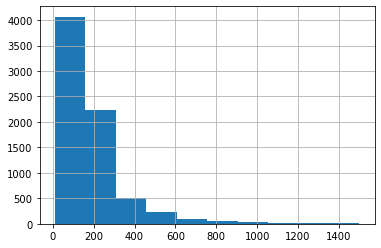

In [83]:
train['price'].hist();

''

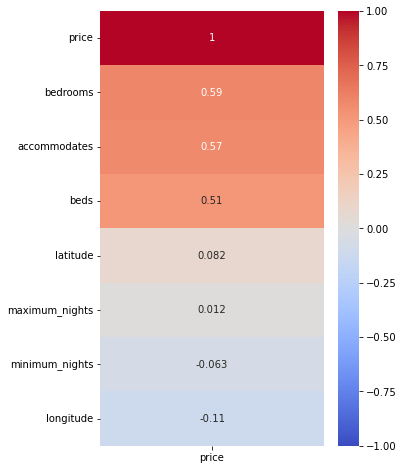

In [76]:
plt.figure(figsize=(5,8))
sns.heatmap(train.corr()[['price']].sort_values('price',ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
; 

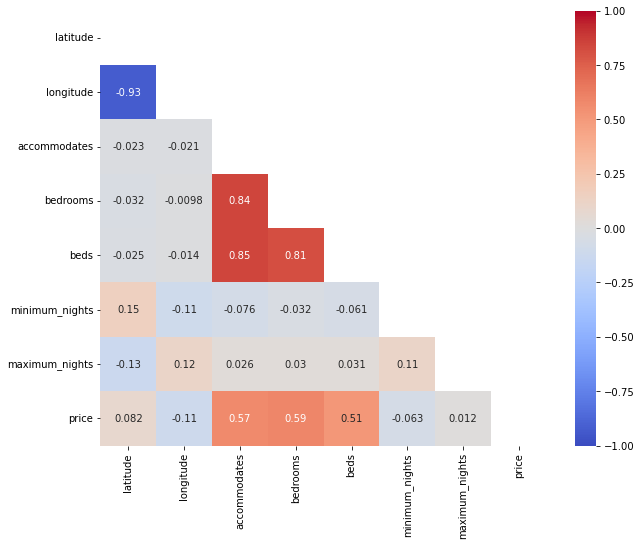

In [81]:
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), 
            mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Text(0.5, 0.98, 'Listing price by size related features')

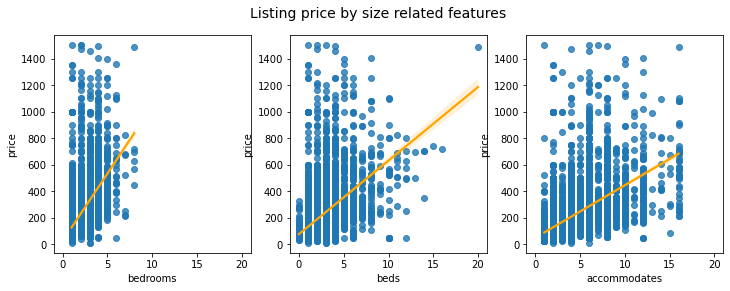

In [98]:
figure, axes = plt.subplots(1, 3, figsize=(12,4), sharex=True)

ax1 = sns.regplot(x='bedrooms',     y='price', data=train, ax=axes[0], line_kws={'color':'orange'})
ax2 = sns.regplot(x='beds',         y='price', data=train, ax=axes[1], line_kws={'color':'orange'})
ax3 = sns.regplot(x='accommodates', y='price', data=train, ax=axes[2], line_kws={'color':'orange'})

plt.suptitle('Listing price by size related features', fontsize=14)

**Observations**: 
1. Listing price is correlated with the number of bedrooms and beds and the number of people it can accommodate. 
2. The number of beds, bedrooms and people the unit can accommodate are highly correlated.

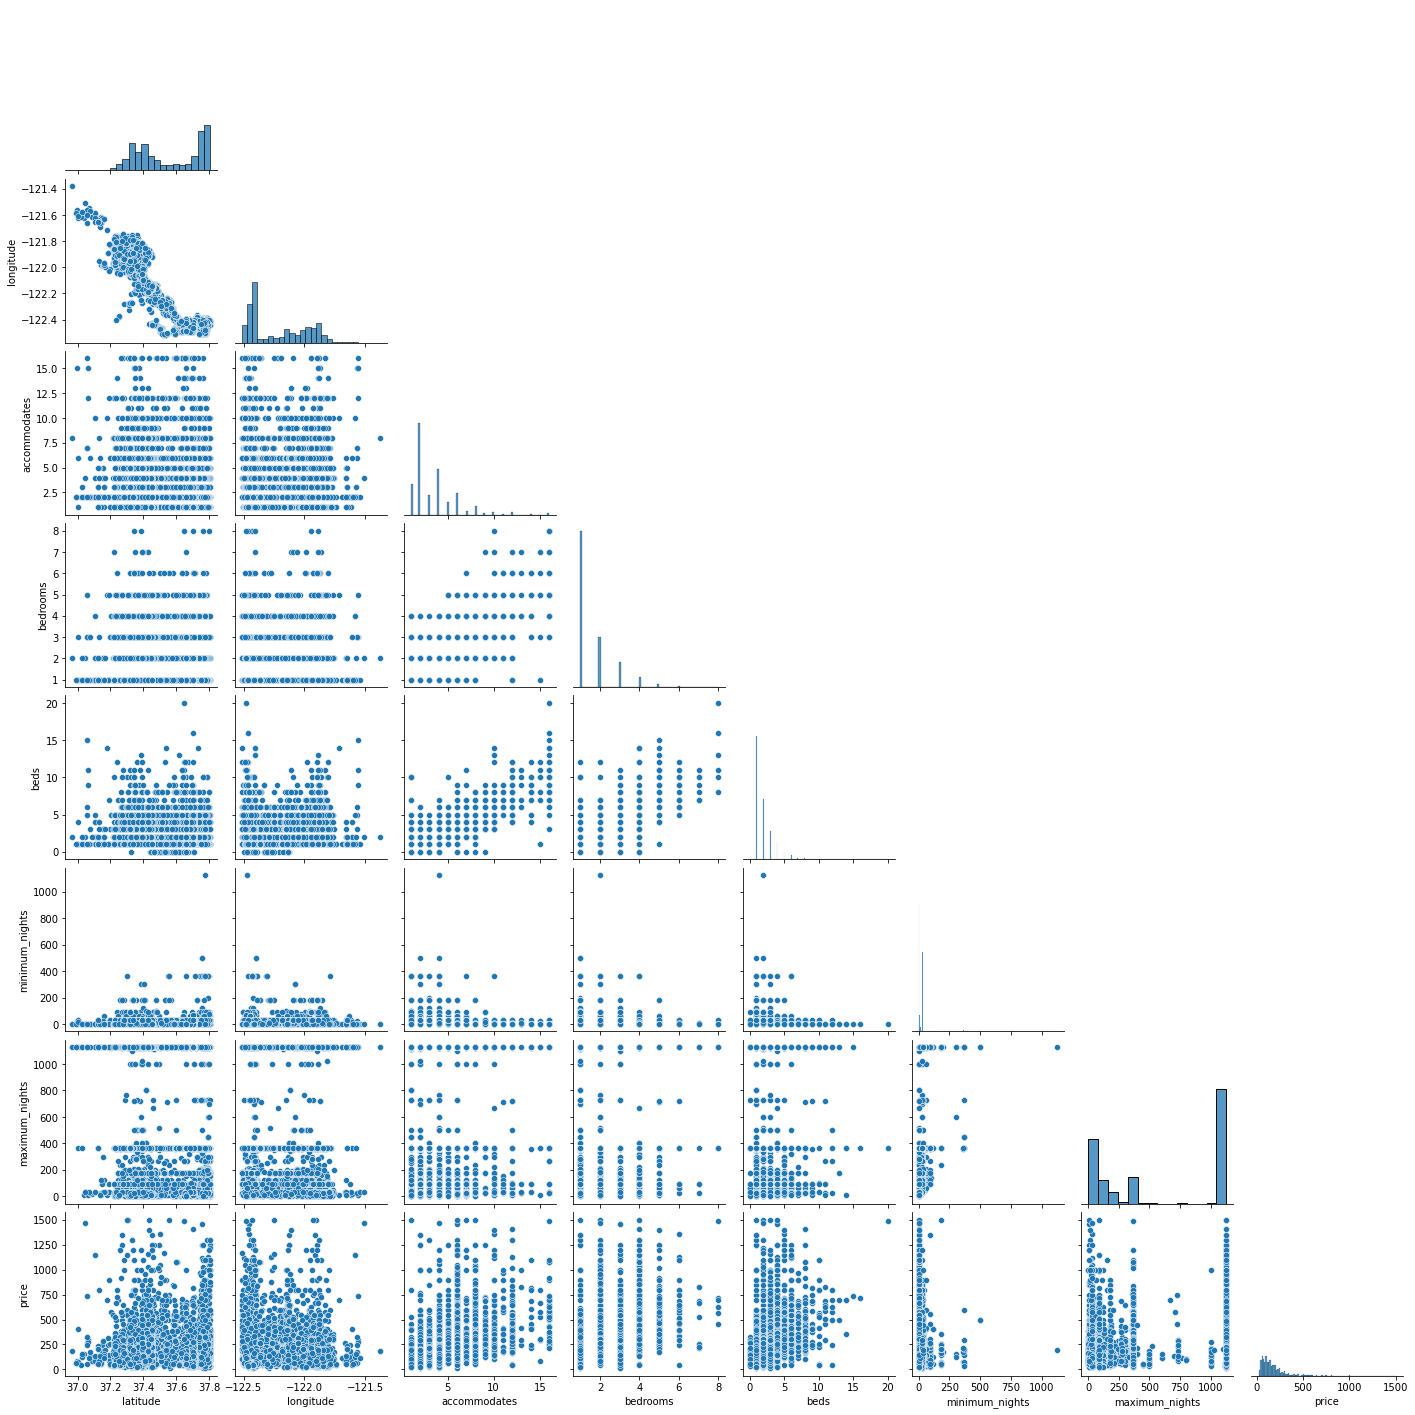

In [84]:
sns.pairplot(train, corner=True)


In [ ]:
# price by categorical 

<AxesSubplot:xlabel='price', ylabel='property_type'>

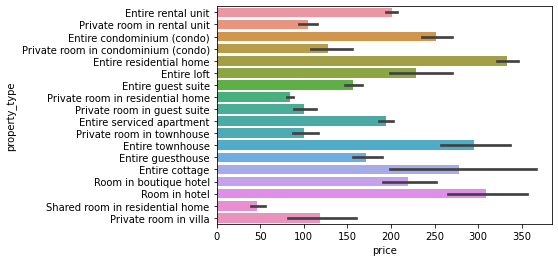

In [112]:
sns.barplot(y='property_type', x='price', data=train, orient='h', )

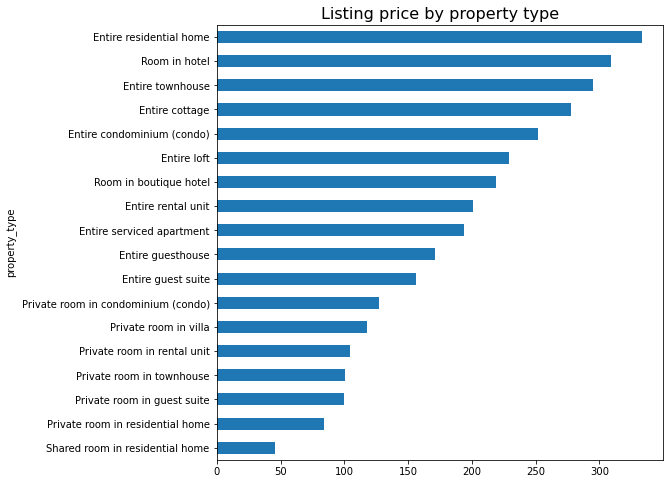

In [124]:
plt.figure(figsize=(8,8))
train.groupby('property_type').mean()['price'].sort_values(ascending=True).plot.barh()
plt.title('Listing price by property type', fontsize=16); 

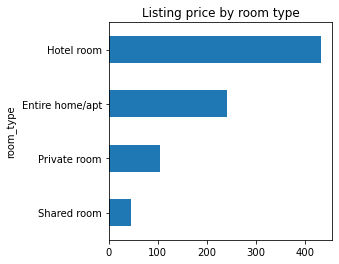

In [127]:
plt.figure(figsize=(4,4))
train.groupby('room_type').mean()['price'].sort_values(ascending=True).plot.barh()
plt.title('Listing price by room type'); 

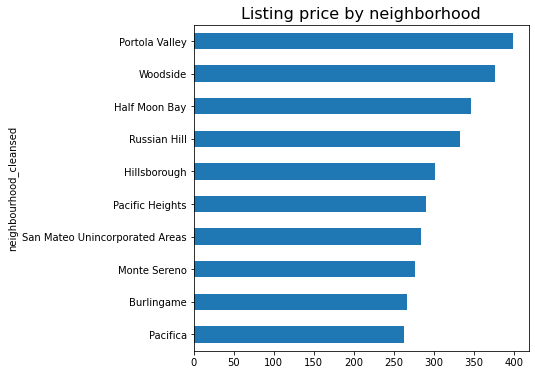

In [139]:
plt.figure(figsize=(6,6))
train.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=True).tail(10).plot.barh()
plt.title('Listing price by neighborhood', fontsize=16); 

In [134]:
train.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False).head(10)

neighbourhood_cleansed
Portola Valley                    398.333333
Woodside                          376.647059
Half Moon Bay                     346.088235
Russian Hill                      332.365854
Hillsborough                      301.428571
Pacific Heights                   290.076923
San Mateo Unincorporated Areas    283.717391
Monte Sereno                      275.833333
Burlingame                        266.863636
Pacifica                          262.640000
Name: price, dtype: float64

## Modeling

In [ ]:
### Transform data: Standardiz

In [ ]:
### Random Forest regressor

In [ ]:
rf = RandomForestRegressor()

pipeline = Pipeline([
    ['rf', 